# 05839 Final Project - Part 1 EDA
## Zhaoyi Ma, Ed Tsoi, Jiawei Ni, Yuzong Gao

### Median rental price data across different states in the United States from 2014-2019
### Datasets used:
1. Zillow house price data (https://www.kaggle.com/paultimothymooney/zillow-house-price-data)
2. Federal Reserve Interest rates, 1954-Present (https://www.kaggle.com/federalreserve/interest-rates)

### Issues Summary:
1. After carefully inspect the dataset, we found that column A contains 0-index of the entries(rows). However, this is not useful for our analysis so we decided to drop it.
2. We also found that there are a lot of NaN values in our datasets. 
3. Based on the result from the univariate analysis below, among the top 15 states, states such as CA, FL and TX have more entries than others, which could lead to skewness on interpretation of the data

In [31]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')

In [32]:
# Colors for plotting:
colors1 = ['#e6ccb2','#b08968','#7f5539'] 
colors2 = ['#ede0d4','#e6ccb2','#ddb892','#b08968','#7f5539','#9c6644','#dda15e']

In [33]:
# Loading data and converting column name to visualize data type easily.
one_bed = pd.read_csv('dataset/City_MedianRentalPrice_1Bedroom.csv')
one_bed.rename(columns = {
    col : f"{col} ({dtype})"
    for col, dtype in one_bed.dtypes.to_dict().items()
}).head()

,Unnamed: 0 (int64),RegionName (object),State (object),Metro (object),CountyName (object),SizeRank (int64),2010-02 (float64),2010-03 (float64),2010-04 (float64),2010-05 (float64),...,2019-03 (float64),2019-04 (float64),2019-05 (float64),2019-06 (float64),2019-07 (float64),2019-08 (float64),2019-09 (float64),2019-10 (float64),2019-11 (float64),2019-12 (float64)
0,0,New York,NY,New York-Newark-Jersey City,Queens County,1,NaN,NaN,NaN,2250.0,...,2350.0,2400.0,2400.0,2450.0,2450.0,2475.0,2475.0,2400.0,2400.0,2425.0
1,1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,NaN,NaN,NaN,...,2360.0,2395.0,2370.0,2395.0,2395.0,2400.0,2425.0,2350.0,2330.0,2340.0
2,2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,NaN,NaN,NaN,NaN,...,1265.0,1270.0,1269.0,1286.0,1275.0,1275.0,1270.0,1264.0,1245.0,1249.0
3,3,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,NaN,NaN,NaN,NaN,...,1695.0,1650.0,1650.0,1634.0,1600.0,1582.0,1595.0,1542.0,1550.0,1550.0
4,4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,NaN,NaN,NaN,NaN,...,985.0,981.0,985.0,999.0,1000.0,1000.0,991.0,985.0,974.5,967.5


## Part A - Data Cleaning for One Bedroom dataset

### Data Cleaning:
1. Check whether there are null/na entries. If so, drop them.
2. Drop column A (unnamed, 0-indexed).
3. Drop columns from 2010-02 to 2013-12 (we are only interested in data from 2014-01 to 2019-12)
4. Replace na values from 2014-01 to 2019-12 with zeroes.



In [34]:
# Print the number of rows and columns
one_bed.shape

(818, 125)

In [35]:
one_bed.head()

,Unnamed: 0,RegionName,State,Metro,CountyName,SizeRank,2010-02,2010-03,2010-04,2010-05,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,0,New York,NY,New York-Newark-Jersey City,Queens County,1,NaN,NaN,NaN,2250.0,...,2350.0,2400.0,2400.0,2450.0,2450.0,2475.0,2475.0,2400.0,2400.0,2425.0
1,1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,NaN,NaN,NaN,...,2360.0,2395.0,2370.0,2395.0,2395.0,2400.0,2425.0,2350.0,2330.0,2340.0
2,2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,NaN,NaN,NaN,NaN,...,1265.0,1270.0,1269.0,1286.0,1275.0,1275.0,1270.0,1264.0,1245.0,1249.0
3,3,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,NaN,NaN,NaN,NaN,...,1695.0,1650.0,1650.0,1634.0,1600.0,1582.0,1595.0,1542.0,1550.0,1550.0
4,4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,NaN,NaN,NaN,NaN,...,985.0,981.0,985.0,999.0,1000.0,1000.0,991.0,985.0,974.5,967.5


In [36]:
# Drop column A (unnamed)
one_bed = one_bed.iloc[:, 1:]
# Drop columns from 2010-02 to 2013-12
dropped_columns = ['2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', 
                   '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
                   '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
                   '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12']
one_bed = one_bed.drop(columns=dropped_columns)

In [37]:
one_bed.dropna(subset=['State'])

,RegionName,State,Metro,CountyName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,New York,NY,New York-Newark-Jersey City,Queens County,1,2600.0,2600.0,2600.0,2600.0,2650.0,...,2350.0,2400.0,2400.0,2450.0,2450.0,2475.0,2475.0,2400.0,2400.0,2425.0
1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,1495.0,1490.0,1450.0,1495.0,1580.0,...,2360.0,2395.0,2370.0,2395.0,2395.0,2400.0,2425.0,2350.0,2330.0,2340.0
2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,1224.0,1125.0,1072.0,1105.0,1210.0,...,1265.0,1270.0,1269.0,1286.0,1275.0,1275.0,1270.0,1264.0,1245.0,1249.0
3,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,1620.0,1549.0,1510.0,1498.0,1495.0,...,1695.0,1650.0,1650.0,1634.0,1600.0,1582.0,1595.0,1542.0,1550.0,1550.0
4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,799.0,800.0,800.0,800.0,775.0,...,985.0,981.0,985.0,999.0,1000.0,1000.0,991.0,985.0,974.5,967.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,Bee Cave,TX,Austin-Round Rock,Travis County,814,NaN,NaN,NaN,NaN,NaN,...,1185.0,1202.0,1179.0,1203.0,1264.0,1304.0,1326.0,1299.0,1250.0,1315.5
814,Century Village,FL,Miami-Fort Lauderdale-West Palm Beach,Palm Beach County,815,NaN,NaN,NaN,NaN,NaN,...,900.0,900.0,900.0,900.0,900.0,925.0,925.0,925.0,925.0,950.0
815,Surfside,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,816,NaN,NaN,NaN,NaN,NaN,...,1875.0,1850.0,1750.0,1800.0,1800.0,1750.0,1750.0,1800.0,1800.0,1850.0
816,Bay Harbor Islands,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,817,NaN,NaN,NaN,NaN,NaN,...,1565.0,1550.0,1512.5,1537.5,1600.0,1597.5,1550.0,1550.0,1550.0,1595.0


In [38]:
# Sanity Check: check whether there are null values in the dataset
one_bed.isnull().sum().sum()
one_bed.isnull().sum()

RegionName    0
State         0
Metro         0
CountyName    0
SizeRank      0
             ..
2019-08       0
2019-09       0
2019-10       0
2019-11       0
2019-12       0
Length: 77, dtype: int64

In [39]:
one_bed.shape

(818, 77)

## Statistical Analysis 1 - Univariate Analysis

In [40]:
def univariate_analysis(data, feature):
    data_ = data[feature].value_counts().sort_values(ascending=True)
    plt.figure(figsize=(30,10), facecolor='white')
    plt.barh(y=data_.index, width=data_.values, 
             height=1, color=colors2, edgecolor='k',linewidth=1)
    sns.despine()
    plt.suptitle(t=feature, x=0.5, y=1.1, fontfamily='serif', fontsize=40, color='k', fontweight='bold',alpha=0.9)
    plt.show()

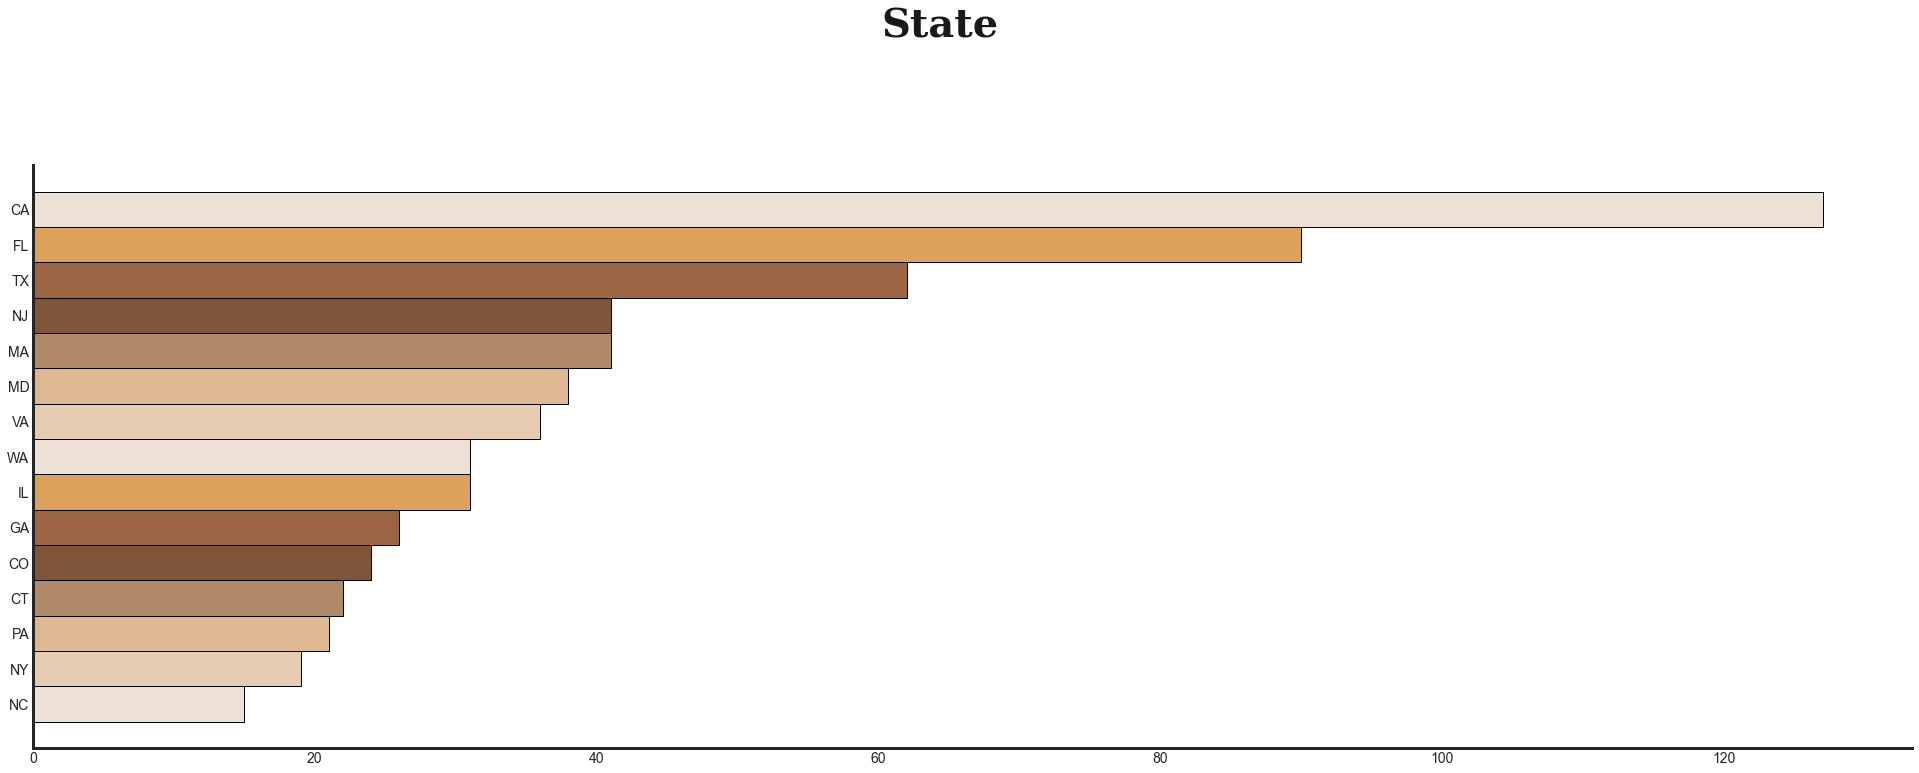

In [41]:
# Picking top 15 states from the dataset to do univariate analysis.
one_bed_subsets = one_bed[one_bed['State'].isin(['CA', 'FL', 'TX', 'NJ', 'MA', 'MD', 'VA', 'WA', 'IL', 'GA', 'CO', 'CT', 'PA', 'NY', 'NC'])]
univariate_analysis(one_bed_subsets, 'State')

<AxesSubplot:>

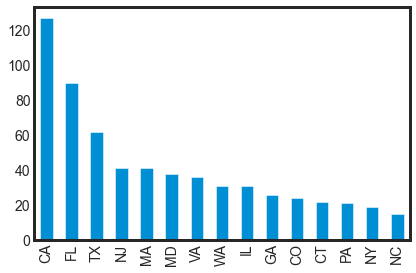

In [42]:
# Alternatively.....
one_bed['State'].value_counts().head(15).plot.bar()

## Statistical Analysis 2?

In [43]:
'''
Below is a helper function that can help us load zillow housing data.
'''
def load_zillow_data(state=None,county=None,region=None,city=None):
    '''
    This function creates a dataframe for whatever city you define.
    The dataframe will have a "Date" column and then it will also have  
    columns for median rental prices and columns for median house prices 
    and it will all be broken down according to the number of bedrooms 
    or according to the type of the unit.
    '''
    # Make a dictionary of file paths
    dictionary_with_file_paths = {'dataset/DaysOnZillow_City.csv' : 'DaysOnZillow_City',
    'dataset/Sale_Prices_City.csv' : 'Sale_Prices_City',
    'dataset/City_MedianRentalPrice_Studio.csv' : 'City_MedianRentalPrice_Studio',
    'dataset/City_MedianRentalPrice_1Bedroom.csv' : 'City_MedianRentalPrice_1Bedroom',
    'dataset/City_MedianRentalPrice_2Bedroom.csv' : 'City_MedianRentalPrice_2Bedroom',
    'dataset/City_MedianRentalPrice_3Bedroom.csv' : 'City_MedianRentalPrice_3Bedroom',
    'dataset/City_MedianRentalPrice_4Bedroom.csv' : 'City_MedianRentalPrice_4Bedroom',
    'dataset/City_MedianRentalPrice_5BedroomOrMore.csv' : 'City_MedianRentalPrice_5BedroomOrMore',
    'dataset/City_Zhvi_1bedroom.csv' : 'City_Zhvi_1bedroom',
    'dataset/City_Zhvi_2bedroom.csv' : 'City_Zhvi_2bedroom',
    'dataset/City_Zhvi_3bedroom.csv' : 'City_Zhvi_3bedroom',
    'dataset/City_Zhvi_4bedroom.csv' : 'City_Zhvi_4bedroom',
    'dataset/City_Zhvi_5BedroomOrMore.csv' : 'City_Zhvi_5BedroomOrMore',
    'dataset/City_Zhvi_AllHomes.csv' : 'City_Zhvi_AllHomes',
    'dataset/City_Zhvi_SingleFamilyResidence.csv' : 'City_Zhvi_SingleFamilyResidence',
    'dataset/City_Zhvi_Condominum.csv' : 'City_Zhvi_Condominum',}

    # Load the files from the file paths into a dictionary of dataframes
    dictionary_with_dataframes = {}
    for file_path, file_name in dictionary_with_file_paths.items():
        name_of_dataframe = str(file_name)
        dictionary_with_dataframes[name_of_dataframe] = pd.read_csv(file_path)
        dictionary_with_dataframes[name_of_dataframe].rename(columns={'Unnamed: 0':'which_measurement'}, inplace=True)
        dictionary_with_dataframes[name_of_dataframe]['which_measurement'] = name_of_dataframe

    # Combine the dataframes into one large dataframe that has a new column that labels each subsection
    filtered_dataframe = pd.concat(dictionary_with_dataframes.values(), ignore_index=True, sort=True)

    # Filter the data according to your needs
    states_to_keep = [state]
    counties_to_keep = [county]
    regions_to_keep = [region]
    cities_to_keep = [city]
    if state == None:
        pass
    else:
        filtered_dataframe = filtered_dataframe[filtered_dataframe.State.isin(states_to_keep)]
    if county == None:
        pass
    else:    
        filtered_dataframe = filtered_dataframe[filtered_dataframe.CountyName.isin(counties_to_keep)]
    if region == None:
        pass
    else:     
        filtered_dataframe = filtered_dataframe[filtered_dataframe.RegionName.isin(regions_to_keep)]
    if city == None:
        pass
    else:     
        filtered_dataframe = filtered_dataframe[filtered_dataframe.Metro.isin(cities_to_keep)]

    # Reshape the data
    for row in filtered_dataframe:
        final_df = filtered_dataframe[[
               '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
               '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
               '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
               '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
               '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
               '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
               '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
               '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
               '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
               '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
               '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
               '2019-07', '2019-08', '2019-09', '2019-10', '2019-11','which_measurement']]
        column_title = final_df['which_measurement'].values
        final_df = final_df.T[:-1]#.fillna(0)
        final_df.columns = [column_title]
    final_df.columns = ['Sale_Prices_City','City_MedianRentalPrice_Studio','City_MedianRentalPrice_1Bedroom',
                          'City_MedianRentalPrice_2Bedroom','City_MedianRentalPrice_3Bedroom',
                          'City_Zhvi_1bedroom','City_Zhvi_2bedroom','City_Zhvi_3bedroom',
                          'City_Zhvi_4bedroom','City_Zhvi_5BedroomOrMore','City_Zhvi_AllHomes',
                          'City_Zhvi_SingleFamilyResidence','City_Zhvi_Condominum']
    final_df['Date'] = final_df.index
    return final_df

def plot_four_columns_using_plotly_express(dataframe,column_one,column_two,column_three,column_four,title,lower_axis_limit,upper_axis_limit):
    '''
    This function plots four numerical columns against a date column.
    It using the plotly express library instead of the normal plotly library.
    '''
    df_melt = dataframe.melt(id_vars='Date', value_vars=[column_one,column_two,column_three,column_four])
    fig = px.line(df_melt, x="Date", y="value", color="variable",title=title).update(layout=dict(xaxis_title='Date',yaxis_title='Median Price ($USD)',legend_orientation="h",showlegend=True))
    fig.update_xaxes(range=[lower_axis_limit,upper_axis_limit])
    fig.show()

<AxesSubplot:title={'center':'Median Prices of Homes and Rental Units in San Francisco, CA'}>

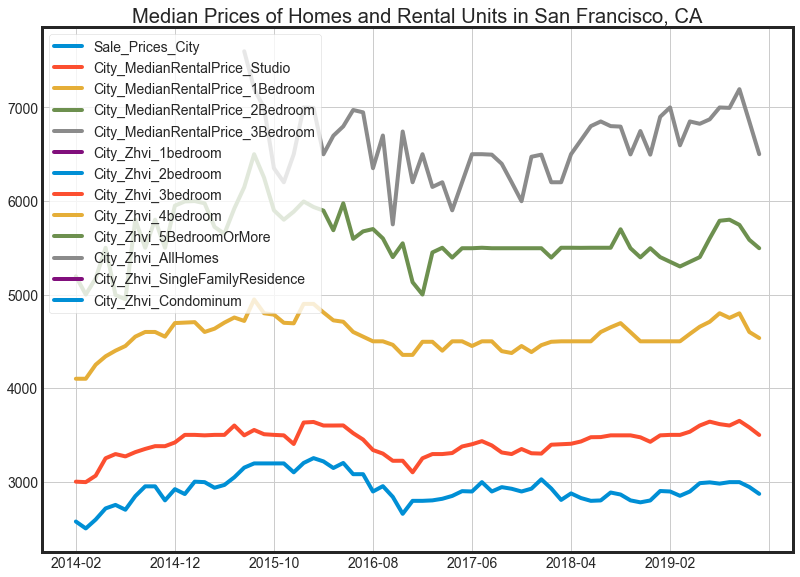

In [44]:
# Plot median rental prices
plot_data = sanfrancisco_df = load_zillow_data(state='CA',county='San Francisco County',
                              region='San Francisco',city='San Francisco-Oakland-Hayward')
sanfrancisco_df.plot(title='Median Prices of Homes and Rental Units in San Francisco, CA',figsize=(12,9), grid=True)
# plot_data = one_bed[]

In [45]:
plot_four_columns_using_plotly_express(sanfrancisco_df,'City_MedianRentalPrice_Studio','City_MedianRentalPrice_1Bedroom',
                                       'City_MedianRentalPrice_2Bedroom','City_MedianRentalPrice_3Bedroom',
                                       'Median Rental Prices in San Francisco, CA','2014-02-01','2019-12-31')

# Potential Research Questions
1. Is there a relationship between median rental price and federal interest rate?
2. Is there a

### Relationship Between Price and Interest Rate

In [46]:
interest_rate = pd.read_csv('dataset/interest_rate.csv')
interest_rate.columns = interest_rate.columns.str.replace(' ', '_')

In [47]:
interest_rate = interest_rate.loc[(interest_rate['Year'] >= 2014) & (interest_rate['Year'] <= 2019)]

In [48]:
interest_rate = interest_rate.drop("Federal_Funds_Target_Rate", axis=1)

In [49]:
interest_rate = interest_rate.dropna(subset=["Inflation_Rate"])

In [50]:
interest_rate.rename(columns = {
    col : f"{col} ({dtype})"
    for col, dtype in interest_rate.dtypes.to_dict().items()
})

,Year (int64),Month (int64),Day (int64),Federal_Funds_Upper_Target (float64),Federal_Funds_Lower_Target (float64),Effective_Federal_Funds_Rate (float64),Real_GDP_(Percent_Change) (float64),Unemployment_Rate (float64),Inflation_Rate (float64)
862,2014,1,1,0.25,0.00,0.07,-1.2,6.6,1.6
863,2014,2,1,0.25,0.00,0.07,NaN,6.7,1.6
864,2014,3,1,0.25,0.00,0.08,NaN,6.7,1.7
865,2014,4,1,0.25,0.00,0.09,4.0,6.2,1.8
866,2014,5,1,0.25,0.00,0.09,NaN,6.3,2.0
867,2014,6,1,0.25,0.00,0.10,NaN,6.1,1.9
868,2014,7,1,0.25,0.00,0.09,5.0,6.2,1.9
869,2014,8,1,0.25,0.00,0.09,NaN,6.2,1.7
870,2014,9,1,0.25,0.00,0.09,NaN,5.9,1.7
871,2014,10,1,0.25,0.00,0.09,2.3,5.7,1.8


In [51]:
dropped_columns = ['2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
                   '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
                   '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12']
one_bed_subset = one_bed.drop(columns=dropped_columns)

In [52]:
one_bed_subset = one_bed_subset.loc[(one_bed_subset['State'] == 'CA') & (one_bed_subset['CountyName'] == 'San Francisco County') & (one_bed_subset['RegionName'] == 'San Francisco') & (one_bed_subset['Metro'] == 'San Francisco-Oakland-Hayward')]

In [53]:
effective_Federal_Funds_Rate = interest_rate["Effective_Federal_Funds_Rate"]
one_bed_by_city = one_bed_subset.iloc[:, 5:].squeeze()

In [54]:
effective_Federal_Funds_Rate.corr(one_bed_by_city)

nan